Logistic Regression

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:,[2,3]]
y = dataset.iloc[:,4]

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


Splitting data into the Training Set and the Test set

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

Feature Scaling

In [6]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

Fitting Logistic Regression to the training set

In [7]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Predict the Test set result

In [9]:
y_pred = classifier.predict(X_test)

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

Making the Confusion Matrix

In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

array([[65,  3],
       [ 8, 24]], dtype=int64)

Visualising the Training set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


<function matplotlib.pyplot.show(*args, **kw)>

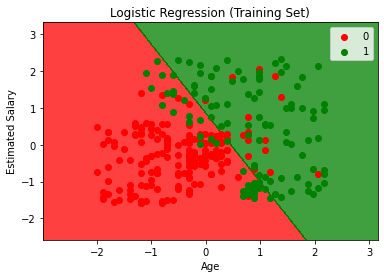

In [21]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1,X2 = np.meshgrid(np.arange(start=X_set[:,0].min() - 1, stop = X_set[:,0].max() + 1, step = 0.01),
                    np.arange(start=X_set[:,1].min() - 1, stop = X_set[:,1].max() + 1, step = 0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0], X_set[y_set == j,1], c=ListedColormap(('red', 'green'))(i),label=j)
plt.title('Logistic Regression (Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show

Visualising the Test set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


<function matplotlib.pyplot.show(*args, **kw)>

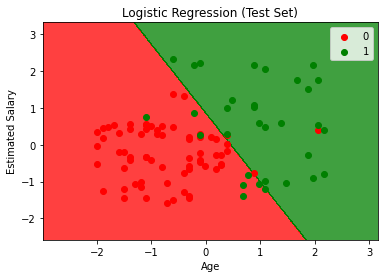

In [18]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1,X2 = np.meshgrid(np.arange(start=X_set[:,0].min() - 1, stop = X_set[:,0].max() + 1, step = 0.01),
                    np.arange(start=X_set[:,1].min() - 1, stop = X_set[:,1].max() + 1, step = 0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0], X_set[y_set == j,1], c=ListedColormap(('red', 'green'))(i),label=j)
plt.title('Logistic Regression (Test Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show